In [1]:
# this program uses convolutional neural networks(CNN) to classify handwritten digits as as numbers 0-9

In [2]:
# import libraries
from keras.models import Sequential 
from keras.layers import Dense,Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np 


Using TensorFlow backend.


In [3]:
# load the data and split it into train and test sets
(x_train,y_train),(x_test , y_test) =mnist.load_data ()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# get the image shape 
print (x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# take a look at the first image ( at index = 0) in the training data set 
x_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
# print the image training label 
y_train[0]

5

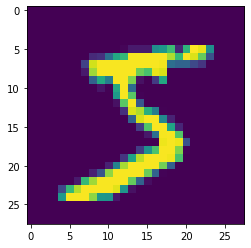

In [7]:
# show the image as a picture 
plt.imshow(x_train[0])

In [8]:
# reshape the data set to fit the model 
x_train = x_train.reshape(60000, 28 ,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [9]:
# one-hot Encoding :
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
#print the new label
print ( y_train_one_hot [0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
# build the CNN model 
model = Sequential()
# add model layers 
model.add(Conv2D(64 , kernel_size=3, activation = 'relu', input_shape =(28,28,1)))
model.add(Conv2D( 32,kernel_size=3,activation='relu'))
model.add(Flatten ())
model.add(Dense(10,activation='softmax'))

In [11]:
# Compile the model
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics =[ 'accuracy'])

In [12]:
# train the model
hist = model.fit(x_train , y_train_one_hot , validation_data =(x_test,y_test_one_hot), epochs = 3) 
model.save('test.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 172s 3ms/step - loss: 0.2071 - accuracy: 0.9542 - val_loss: 0.0813 - val_accuracy: 0.9763
Epoch 2/3
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0816 - val_accuracy: 0.9760
Epoch 3/3
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0778 - val_accuracy: 0.9771


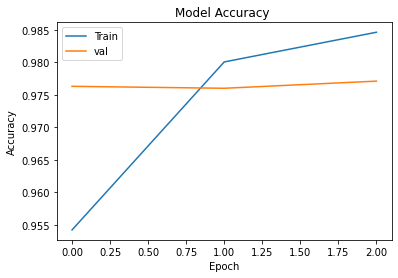

In [13]:
#visualize the models accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title ('Model Accuracy ')
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.legend(['Train', 'val'], loc = 'upper left')
plt.show()

In [14]:
# show prediction as probabilities for the firsst 4 images in the test set 
predictions = model.predict(x_test[:8])
predictions 

array([[2.86596219e-10, 2.21878608e-15, 2.32890995e-09, 2.62152116e-06,
        1.10287227e-13, 3.38430985e-11, 1.44494402e-14, 9.99997377e-01,
        4.13635542e-10, 1.20398340e-08],
       [1.28662782e-06, 7.14869600e-07, 9.99988794e-01, 1.31471598e-08,
        1.18093393e-08, 6.68593924e-13, 8.93603647e-06, 1.71616627e-11,
        2.68395354e-07, 1.76139257e-16],
       [7.19653417e-06, 9.99538779e-01, 4.55747613e-05, 7.54900142e-09,
        1.87069949e-04, 2.06035952e-06, 3.38193871e-07, 3.02133340e-05,
        1.88718666e-04, 5.60404061e-08],
       [9.99996424e-01, 1.53785977e-11, 2.21991991e-06, 1.37447432e-12,
        7.97348587e-09, 7.43888551e-09, 3.00942759e-07, 8.57396487e-10,
        3.61972496e-08, 9.87591307e-07],
       [5.60969582e-09, 6.17618695e-13, 2.43767256e-10, 4.78257462e-13,
        9.99998450e-01, 3.23093483e-12, 2.36918276e-12, 2.25149847e-12,
        4.57475724e-12, 1.56114049e-06],
       [4.36408664e-06, 9.99932647e-01, 5.16557861e-07, 3.32230687e-09,
   

In [15]:
# print the predictions as number labels for the first four images 
print (np.argmax(predictions , axis =1))
# print the actual labels
print(y_test[:8])

[7 2 1 0 4 1 4 9]
[7 2 1 0 4 1 4 9]


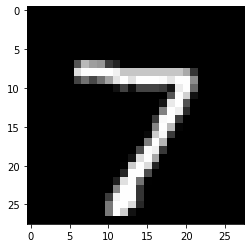

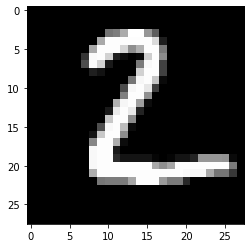

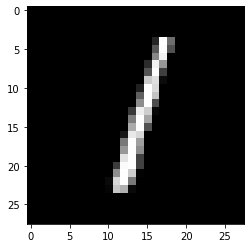

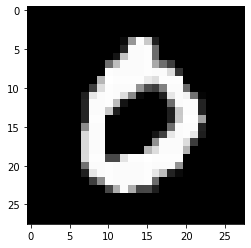

In [16]:
# show the first images as pictures 
for i in range (0,4):
  image =x_test[i]
  image =np.array(image ,dtype='float')
  pixels = image.reshape ((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()